# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

**Importar datasets**

In [2]:
training_data = pd.read_csv("training_data.csv", encoding='latin-1')
test_data = pd.read_csv("test_data.csv", encoding='latin-1')

**Informações do dataset**

In [3]:
training_data.keys()

Index(['city_name', 'record_date', 'AVERAGE_SPEED_DIFF',
       'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'],
      dtype='object')

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [5]:
training_data.isna().any()

city_name                  False
record_date                False
AVERAGE_SPEED_DIFF         False
AVERAGE_FREE_FLOW_SPEED    False
AVERAGE_TIME_DIFF          False
AVERAGE_FREE_FLOW_TIME     False
LUMINOSITY                 False
AVERAGE_TEMPERATURE        False
AVERAGE_ATMOSP_PRESSURE    False
AVERAGE_HUMIDITY           False
AVERAGE_WIND_SPEED         False
AVERAGE_CLOUDINESS          True
AVERAGE_PRECIPITATION      False
AVERAGE_RAIN                True
dtype: bool

In [6]:
training_data.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [7]:
training_data.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


**Verificar outliers**

<AxesSubplot:>

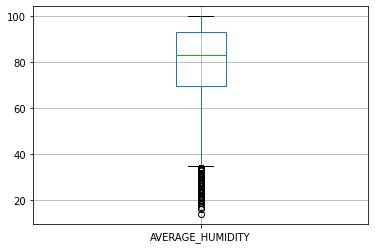

In [8]:
training_data.boxplot(column='AVERAGE_HUMIDITY')

<AxesSubplot:>

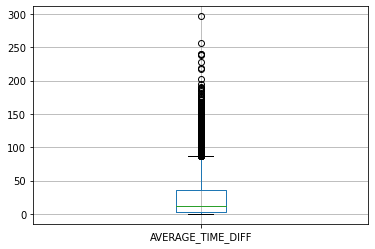

In [9]:
training_data.boxplot(column='AVERAGE_TIME_DIFF')

In [10]:
#REMOVER OUTLIERS
from scipy.stats.mstats import winsorize
training_data['AVERAGE_FREE_FLOW_SPEED']=winsorize(training_data['AVERAGE_FREE_FLOW_SPEED'],(0.01,0.02))
training_data['AVERAGE_TIME_DIFF']=winsorize(training_data['AVERAGE_TIME_DIFF'],(0.01,0.01))
training_data['AVERAGE_FREE_FLOW_TIME']=winsorize(training_data['AVERAGE_FREE_FLOW_TIME'],(0.02,0.02))
training_data['AVERAGE_TEMPERATURE']=winsorize(training_data['AVERAGE_TEMPERATURE'],(0.01,0.02))
training_data['AVERAGE_ATMOSP_PRESSURE']=winsorize(training_data['AVERAGE_ATMOSP_PRESSURE'],(0.04,0.02))
training_data['AVERAGE_HUMIDITY']=winsorize(training_data['AVERAGE_HUMIDITY'],(0.03,0.01))
training_data['AVERAGE_WIND_SPEED']=winsorize(training_data['AVERAGE_WIND_SPEED'],(0.01,0.02))

<AxesSubplot:>

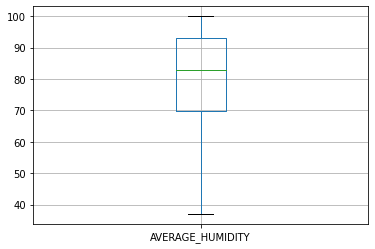

In [11]:
training_data.boxplot(column='AVERAGE_HUMIDITY')

<AxesSubplot:>

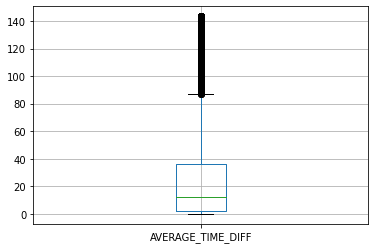

In [12]:
training_data.boxplot(column='AVERAGE_TIME_DIFF')

**Preparar dataset**

In [13]:
'''
Preparar o dataset
'''
#City name é sempre porto logo pode-se fazer drop
#Drop
training_data = training_data.drop(['city_name'], axis=1)
#Average percipitation é sempre 0 logo pode-se fazer drop
training_data = training_data.drop(['AVERAGE_PRECIPITATION'], axis=1)

**Normalizar data set**

In [14]:
#Precisamos de escalar certos valores para 0-1
training_data['AVERAGE_FREE_FLOW_SPEED'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_FREE_FLOW_SPEED']).reshape(-1,1))
training_data['AVERAGE_TIME_DIFF'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_TIME_DIFF']).reshape(-1,1))
training_data['AVERAGE_FREE_FLOW_TIME'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_FREE_FLOW_TIME']).reshape(-1,1))
training_data['AVERAGE_TEMPERATURE'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_TEMPERATURE']).reshape(-1,1))
training_data['AVERAGE_ATMOSP_PRESSURE'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_ATMOSP_PRESSURE']).reshape(-1,1))
training_data['AVERAGE_HUMIDITY'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_HUMIDITY']).reshape(-1,1))
training_data['AVERAGE_WIND_SPEED'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_WIND_SPEED']).reshape(-1,1))


training_data.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN
0,2019-08-29 07:00:00,Medium,0.552941,0.080195,0.253823,LIGHT,0.458333,0.541667,1.000000,0.375,NaN,NaN
1,2018-08-10 14:00:00,High,0.564706,0.336820,0.743119,LIGHT,0.708333,0.625000,0.253968,0.625,céu claro,NaN
2,2019-09-01 16:00:00,High,0.382353,0.267782,0.675841,LIGHT,0.916667,0.333333,0.380952,0.500,NaN,NaN
3,2019-02-26 11:00:00,High,0.311765,0.425384,0.948012,LIGHT,0.583333,0.791667,0.174603,0.500,céu claro,NaN
4,2019-06-06 12:00:00,Medium,0.558824,0.351464,0.425076,LIGHT,0.458333,0.083333,0.714286,1.000,NaN,NaN


**Criar coluna com intervalos de horas**

In [15]:
dfdate= pd.to_datetime(training_data['record_date'])
#training_data['record_date'] =  pd.to_datetime(training_data['record_date'], infer_datetime_format=True)
# define the bins
bins = [0, 7, 11, 14, 17, 19, 21, 24]

# add custom labels if desired
labels = ['00:00-06:59', '07:00-10:59', '11:00-13:59', '14:00-16:59', '17:00-18:59', '19:00-20:59', '21:00-23:59']

# add the bins to the dataframe
training_data['Time Bin'] = pd.cut(dfdate.dt.hour, bins, labels=labels, right=False)
dfdate = pd.to_datetime(test_data['record_date'])
test_data['Time Bin'] = pd.cut(dfdate.dt.hour, bins, labels=labels, right=False)

def ismeia(cols):
    TimeBin=cols
    if TimeBin==labels[0]:
        return 1
    else:
        return 0
    
def issete(cols):
    TimeBin=cols
    if TimeBin==labels[1]:
        return 1
    else:
        return 0

def isonze(cols):
    TimeBin=cols
    if TimeBin==labels[2]:
        return 1
    else:
        return 0
    
def isquatorze(cols):
    TimeBin=cols
    if TimeBin==labels[3]:
        return 1
    else:
        return 0
    
def isdessasete(cols):
    TimeBin=cols
    if TimeBin==labels[4]:
        return 1
    else:
        return 0
    

def isdezanove(cols):
    TimeBin=cols
    if TimeBin==labels[5]:
        return 1
    else:
        return 0
    
def isvinteum(cols):
    TimeBin=cols
    if TimeBin==labels[6]:
        return 1
    else:
        return 0
    


training_data[labels[0]] = training_data['Time Bin'].apply(ismeia)
training_data[labels[1]] = training_data['Time Bin'].apply(issete)
training_data[labels[2]] = training_data['Time Bin'].apply(isonze)
training_data[labels[3]] = training_data['Time Bin'].apply(isquatorze)
training_data[labels[4]] = training_data['Time Bin'].apply(isdessasete)
training_data[labels[5]] = training_data['Time Bin'].apply(isdezanove)
training_data[labels[6]] = training_data['Time Bin'].apply(isvinteum)

training_data=training_data.drop('Time Bin',axis=1)

test_data[labels[0]] = test_data['Time Bin'].apply(ismeia)
test_data[labels[1]] = test_data['Time Bin'].apply(issete)
test_data[labels[2]] = test_data['Time Bin'].apply(isonze)
test_data[labels[3]] = test_data['Time Bin'].apply(isquatorze)
test_data[labels[4]] = test_data['Time Bin'].apply(isdessasete)
test_data[labels[5]] = test_data['Time Bin'].apply(isdezanove)
test_data[labels[6]] = test_data['Time Bin'].apply(isvinteum)


test_data=test_data.drop('Time Bin',axis=1)

training_data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59
0,2019-08-29 07:00:00,Medium,0.552941,0.080195,0.253823,LIGHT,0.458333,0.541667,1.000000,0.375,NaN,NaN,0,1,0,0,0,0,0
1,2018-08-10 14:00:00,High,0.564706,0.336820,0.743119,LIGHT,0.708333,0.625000,0.253968,0.625,céu claro,NaN,0,0,0,1,0,0,0
2,2019-09-01 16:00:00,High,0.382353,0.267782,0.675841,LIGHT,0.916667,0.333333,0.380952,0.500,NaN,NaN,0,0,0,1,0,0,0
3,2019-02-26 11:00:00,High,0.311765,0.425384,0.948012,LIGHT,0.583333,0.791667,0.174603,0.500,céu claro,NaN,0,0,1,0,0,0,0
4,2019-06-06 12:00:00,Medium,0.558824,0.351464,0.425076,LIGHT,0.458333,0.083333,0.714286,1.000,NaN,NaN,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,Low,0.535294,0.025802,0.727829,LIGHT,0.208333,1.000000,0.539683,0.500,céu claro,NaN,0,1,0,0,0,0,0
6808,2019-06-08 18:00:00,Medium,0.400000,0.361925,0.422018,LIGHT,0.541667,0.583333,0.412698,0.750,NaN,NaN,0,0,0,0,1,0,0
6809,2018-10-02 04:00:00,None,0.441176,0.000000,0.795107,DARK,0.458333,0.583333,0.031746,0.500,céu claro,NaN,1,0,0,0,0,0,0
6810,2019-01-30 01:00:00,None,0.558824,0.000000,0.685015,DARK,0.166667,0.500000,0.698413,0.125,algumas nuvens,NaN,1,0,0,0,0,0,0


**Criar coluna para dias da semana ou fim-de-semana**

In [16]:
def isweekday(cols):
    dayofweek=cols
    if dayofweek=='Saturday' or dayofweek=='Sunday':
        return 0
    else:
        return 1

dfdate= pd.to_datetime(training_data['record_date'])
asd= dfdate.dt.day_name()
training_data['IsDayOfWeek'] = asd.apply(isweekday)

dfdate= pd.to_datetime(test_data['record_date'])
asd= dfdate.dt.day_name()
test_data['IsDayOfWeek'] = asd.apply(isweekday)

training_data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,2019-08-29 07:00:00,Medium,0.552941,0.080195,0.253823,LIGHT,0.458333,0.541667,1.000000,0.375,NaN,NaN,0,1,0,0,0,0,0,1
1,2018-08-10 14:00:00,High,0.564706,0.336820,0.743119,LIGHT,0.708333,0.625000,0.253968,0.625,céu claro,NaN,0,0,0,1,0,0,0,1
2,2019-09-01 16:00:00,High,0.382353,0.267782,0.675841,LIGHT,0.916667,0.333333,0.380952,0.500,NaN,NaN,0,0,0,1,0,0,0,0
3,2019-02-26 11:00:00,High,0.311765,0.425384,0.948012,LIGHT,0.583333,0.791667,0.174603,0.500,céu claro,NaN,0,0,1,0,0,0,0,1
4,2019-06-06 12:00:00,Medium,0.558824,0.351464,0.425076,LIGHT,0.458333,0.083333,0.714286,1.000,NaN,NaN,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,Low,0.535294,0.025802,0.727829,LIGHT,0.208333,1.000000,0.539683,0.500,céu claro,NaN,0,1,0,0,0,0,0,0
6808,2019-06-08 18:00:00,Medium,0.400000,0.361925,0.422018,LIGHT,0.541667,0.583333,0.412698,0.750,NaN,NaN,0,0,0,0,1,0,0,0
6809,2018-10-02 04:00:00,None,0.441176,0.000000,0.795107,DARK,0.458333,0.583333,0.031746,0.500,céu claro,NaN,1,0,0,0,0,0,0,1
6810,2019-01-30 01:00:00,None,0.558824,0.000000,0.685015,DARK,0.166667,0.500000,0.698413,0.125,algumas nuvens,NaN,1,0,0,0,0,0,0,1


**Tratar dados em falta AVERAGE_CLOUDINESS**

In [17]:
training_data['AVERAGE_CLOUDINESS'].unique()

#nan

# céu claro
#ceu limpo

#nuvens dispersas
#algumas nuvens
#ceu pouco nublado
#nuvens quebrados
#nuvens qubradas

#nublado
#tempo nublado

training_data.replace(to_replace ="céu claro", 
                 value = 0.999999, 
                  inplace = True)

training_data.replace(to_replace ="céu limpo", 
                 value = 0.999999, 
                  inplace = True)

training_data.replace(to_replace ="nuvens dispersas", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="algumas nuvens", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="céu pouco nublado", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="nuvens quebrados", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="nuvens quebradas", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="nublado", 
                 value = 0.333333, 
                  inplace = True)

training_data.replace(to_replace ="tempo nublado", 
                 value = 0.333333, 
                  inplace = True)

training_data.replace(to_replace ="NULL", 
                 value = 0.3, 
                  inplace = True)

training_data.replace(to_replace =r'^\s*$', 
                 value = 0.3, 
                 regex=True,
                 inplace = True)

training_data["AVERAGE_CLOUDINESS"] = training_data["AVERAGE_CLOUDINESS"].fillna("MISSING VALUE")

dftmp = training_data[training_data["AVERAGE_CLOUDINESS"]!="MISSING VALUE"]

mediaRAS = dftmp.mean()

training_data.replace(to_replace ="MISSING VALUE", 
                  value = mediaRAS, 
                  inplace = True)

training_data.isna().any()

C:\Users\luisf\anaconda3\envs\env_DAA\lib\site-packages\ipykernel_launcher.py:66: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


record_date                False
AVERAGE_SPEED_DIFF         False
AVERAGE_FREE_FLOW_SPEED    False
AVERAGE_TIME_DIFF          False
AVERAGE_FREE_FLOW_TIME     False
LUMINOSITY                 False
AVERAGE_TEMPERATURE        False
AVERAGE_ATMOSP_PRESSURE    False
AVERAGE_HUMIDITY           False
AVERAGE_WIND_SPEED         False
AVERAGE_CLOUDINESS         False
AVERAGE_RAIN                True
00:00-06:59                False
07:00-10:59                False
11:00-13:59                False
14:00-16:59                False
17:00-18:59                False
19:00-20:59                False
21:00-23:59                False
IsDayOfWeek                False
dtype: bool

**Tratar dados LUMINOSITY**

In [18]:
training_data.replace(to_replace ="DARK", 
                 value = 0.333333, 
                  inplace = True)

training_data.replace(to_replace ="LOW_LIGHT", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="LIGHT", 
                 value = 0.999999, 
                  inplace = True)

training_data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,2019-08-29 07:00:00,Medium,0.552941,0.080195,0.253823,0.999999,0.458333,0.541667,1.000000,0.375,0.795883,NaN,0,1,0,0,0,0,0,1
1,2018-08-10 14:00:00,High,0.564706,0.336820,0.743119,0.999999,0.708333,0.625000,0.253968,0.625,0.999999,NaN,0,0,0,1,0,0,0,1
2,2019-09-01 16:00:00,High,0.382353,0.267782,0.675841,0.999999,0.916667,0.333333,0.380952,0.500,0.795883,NaN,0,0,0,1,0,0,0,0
3,2019-02-26 11:00:00,High,0.311765,0.425384,0.948012,0.999999,0.583333,0.791667,0.174603,0.500,0.999999,NaN,0,0,1,0,0,0,0,1
4,2019-06-06 12:00:00,Medium,0.558824,0.351464,0.425076,0.999999,0.458333,0.083333,0.714286,1.000,0.795883,NaN,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,Low,0.535294,0.025802,0.727829,0.999999,0.208333,1.000000,0.539683,0.500,0.999999,NaN,0,1,0,0,0,0,0,0
6808,2019-06-08 18:00:00,Medium,0.400000,0.361925,0.422018,0.999999,0.541667,0.583333,0.412698,0.750,0.795883,NaN,0,0,0,0,1,0,0,0
6809,2018-10-02 04:00:00,None,0.441176,0.000000,0.795107,0.333333,0.458333,0.583333,0.031746,0.500,0.999999,NaN,1,0,0,0,0,0,0,1
6810,2019-01-30 01:00:00,None,0.558824,0.000000,0.685015,0.333333,0.166667,0.500000,0.698413,0.125,0.666666,NaN,1,0,0,0,0,0,0,1


**Retirar colunas com dados categóricos**

In [19]:
training_data = training_data.drop(['record_date'], axis=1)
training_data = training_data.drop(['AVERAGE_RAIN'], axis=1)

**Separar os dados de treino e dados de teste**

In [20]:
X= training_data.drop('AVERAGE_SPEED_DIFF', axis=1)
y = training_data['AVERAGE_SPEED_DIFF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

**Verificar distribuição de dados de treino e teste**

C:\Users\luisf\anaconda3\envs\env_DAA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

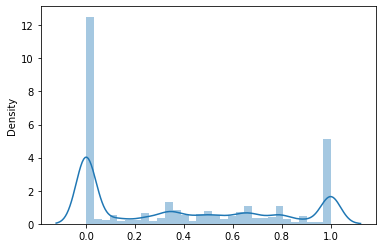

In [21]:
sns.distplot(X_train)

C:\Users\luisf\anaconda3\envs\env_DAA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

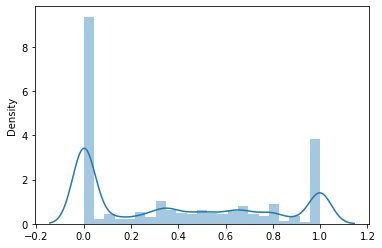

In [22]:
sns.distplot(X_test)

**Treinar modelo**

In [23]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#model = SVC(random_state=2027)

model = DecisionTreeClassifier(random_state=2021)

# Só funciona com valore continuos
#model = DecisionTreeRegressor(random_state=2021)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

**Verificar predictions**

0.71 accuracy


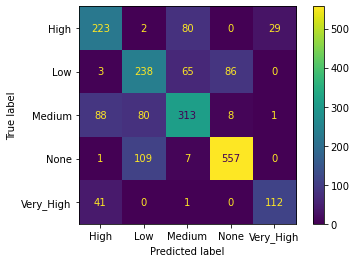

In [24]:
predictions = model.predict(X_test)
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))
plot_confusion_matrix(model, X_test, y_test)

**Criar dicionário com os hyperparametros dos algoritmos**

In [25]:
#C_range = np.logspace(0, 4, 5)
#gamma_range = np.logspace(-4, 0, 5)
#param_grid = dict(gamma=gamma_range, C=C_range, kernel=['rbf'])

#Modelo SVC
#param_grid = {'C':[100000.0,1 ], 'gamma':[0.0326222200971167], 'kernel':['rbf']}

#Modelo DecisionTreeClassifier
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,170,200]}

#Modelo DecisionTreeRegressor
#param_grid = {'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'splitter':['best','random'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,170,200]}

**Grid Search encontrar e treinar e modelo com melhores parametros**

In [26]:
from sklearn.model_selection import GridSearchCV
#grid = GridSearchCV(SVC(random_state=2021), param_grid, refit=True, n_jobs=4, verbose=3)

grid = GridSearchCV(DecisionTreeClassifier(random_state=2021), param_grid, refit=True, n_jobs=4, verbose=3)

#grid = GridSearchCV(DecisionTreeRegressor(random_state=2021), param_grid, refit=True, n_jobs=4, verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=2021), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150, 170, 200]},
             verbose=3)

**Model Evaluation**

In [27]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

grid.best_params_

              precision    recall  f1-score   support

        High       0.71      0.72      0.71       334
         Low       0.61      0.71      0.65       392
      Medium       0.74      0.70      0.72       490
        None       0.89      0.85      0.87       674
   Very_High       0.80      0.77      0.78       154

    accuracy                           0.76      2044
   macro avg       0.75      0.75      0.75      2044
weighted avg       0.76      0.76      0.76      2044



{'criterion': 'gini', 'max_depth': 6}

**Tratar dados do test_data**

In [28]:
test_data = test_data.drop(['record_date'], axis=1)
test_data = test_data.drop(['city_name'], axis=1)
test_data = test_data.drop(['AVERAGE_CLOUDINESS'], axis=1)
test_data = test_data.drop(['AVERAGE_RAIN'], axis=1)
test_data = test_data.drop(['AVERAGE_PRECIPITATION'], axis=1)

test_data.replace(to_replace =r'^\s*$', 
                 value = 0.3, 
                regex=True,
                 inplace = True)

test_data["AVERAGE_CLOUDINESS"] = training_data["AVERAGE_CLOUDINESS"].fillna("MISSING VALUE")


test_data.replace(to_replace ="MISSING VALUE", 
                 value = 0.555555, 
                  inplace = True)

test_data.replace(to_replace ="céu claro", 
                 value = 0.999999, 
                  inplace = True)

test_data.replace(to_replace ="céu limpo", 
                 value = 0.999999, 
                  inplace = True)

test_data.replace(to_replace ="nuvens dispersas", 
                 value = 0.666666, 
                  inplace = True)


test_data.replace(to_replace ="algumas nuvens", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="céu pouco nublado", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="nuvens quebrados", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="nuvens quebradas", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="nublado", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="tempo nublado", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="NULL", 
                 value = 0.3, 
                  inplace = True)

#Agora temos de tratar da Luminosity

test_data.replace(to_replace ="DARK", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="LOW_LIGHT", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="LIGHT", 
                 value = 0.999999, 
                  inplace = True)

#Normalzie data

test_data['AVERAGE_FREE_FLOW_SPEED'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_FREE_FLOW_SPEED']).reshape(-1,1))
test_data['AVERAGE_TIME_DIFF'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_TIME_DIFF']).reshape(-1,1))
test_data['AVERAGE_FREE_FLOW_TIME'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_FREE_FLOW_TIME']).reshape(-1,1))
test_data['AVERAGE_TEMPERATURE'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_TEMPERATURE']).reshape(-1,1))
test_data['AVERAGE_ATMOSP_PRESSURE'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_ATMOSP_PRESSURE']).reshape(-1,1))
test_data['AVERAGE_HUMIDITY'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_HUMIDITY']).reshape(-1,1))
test_data['AVERAGE_WIND_SPEED'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_WIND_SPEED']).reshape(-1,1))
test_data.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek,AVERAGE_CLOUDINESS
0,0.325397,0.000000,0.739655,0.333333,0.225806,0.854167,0.662791,0.076923,0,0,0,0,0,0,1,1,0.795883
1,0.456349,0.052518,0.494828,0.333333,0.322581,0.729167,0.918605,0.307692,0,0,0,0,0,1,0,1,0.999999
2,0.591270,0.000000,0.658621,0.333333,0.419355,0.666667,0.918605,0.000000,1,0,0,0,0,0,0,1,0.795883
3,0.087302,0.222557,0.720690,0.999999,0.677419,0.645833,0.732558,0.307692,0,0,0,0,1,0,0,0,0.999999
4,0.515873,0.015067,0.644828,0.333333,0.354839,0.395833,1.000000,0.692308,1,0,0,0,0,0,0,1,0.795883


In [29]:
grid_predictions = grid.predict(test_data)

In [30]:
grid_predictions

array(['None', 'Low', 'None', ..., 'None', 'High', 'Low'], dtype=object)

**Criar ficheiro de submissão**

In [31]:
numpy_data = np.array(grid_predictions)
numpy_data = pd.DataFrame(numpy_data)

#transposing
df = numpy_data.transpose()
df_t = df.T
# print dataframe columns

df_t = df_t.set_axis(["Speed_Diff"], axis=1)
df_t.index = df_t.index+1

df_t
df_t.to_csv("submission_tree2.csv", index_label='RowId')